In [2]:
import pandas as p
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import os
import glob

In [3]:
arquivos = glob.glob('prev/*.csv')
lista = []

In [4]:
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';')
  lista.append(estado)

In [5]:
rombo = p.concat(lista)
rombo.head()

,CPF_CNPJ,TIPO_PESSOA,TIPO_DEVEDOR,NOME_DEVEDOR,UF_UNIDADE_RESPONSAVEL,UNIDADE_RESPONSAVEL,NUMERO_INSCRICAO,TIPO_SITUACAO_INSCRICAO,SITUACAO_INSCRICAO,TIPO_CREDITO,DATA_INSCRICAO,INDICADOR_AJUIZADO,VALOR_CONSOLIDADO
0,84.307.115/0001-13,Pessoa jurídica,Principal,SANTOS ADMINISTRACAO DE IMOVEIS LTDA,AC,ACRE,404627030,Em cobrança,AJUIZAMENTO / DISTRIBUICAO,OUTROS,25/08/2013,SIM,22066.01
1,05.086.502/0001-09,Pessoa jurídica,Principal,C. J. CONSTRUCOES E SERVICOS LTDA,AC,ACRE,365697923,Em cobrança,AJUIZAMENTO / DISTRIBUICAO,OUTROS,16/12/2012,SIM,77843.98
2,05.086.502/0001-09,Pessoa jurídica,Principal,C. J. CONSTRUCOES E SERVICOS LTDA,AC,ACRE,396434010,Em cobrança,AJUIZAMENTO / DISTRIBUICAO,OUTROS,16/12/2012,SIM,400007.93
3,04.045.191/0001-69,Pessoa jurídica,Principal,POSTO TRIANGULO LTDA,AC,ACRE,370615565,Benefício Fiscal,NEGOCIADO NO SISPAR,OUTROS,15/06/2019,NAO,93441.70
4,04.045.191/0001-69,Pessoa jurídica,Principal,POSTO TRIANGULO LTDA,AC,ACRE,370451651,Benefício Fiscal,NEGOCIADO NO SISPAR,AFERICAO INDIRETA,15/06/2019,NAO,365702.69


In [18]:
em2018 = rombo['DATA_INSCRICAO'].str.contains("2018")

rombo2018 = rombo[em2018]
rombo2018['VALOR_CONSOLIDADO'].count()

1206452

In [7]:
total2018 = rombo2018.groupby('TIPO_PESSOA').agg('sum').sort_values(['VALOR_CONSOLIDADO'], ascending=[0])
total2018.filter(items=['TIPO_PESSOA', 'VALOR_CONSOLIDADO'])

,VALOR_CONSOLIDADO
TIPO_PESSOA,
Pessoa jurídica,5.042443e+10
Pessoa física,2.751662e+08


In [8]:
div = round(total2018['VALOR_CONSOLIDADO'][0]/1000000000, 1)
nota = 'Apenas no ano anterior à reforma (2018), o "déficit" da previdência aumentou em {} bilhões de reais por causa da sonegação de empresas.'.format(div)
print(nota)

Apenas no ano anterior à reforma (2018), o "déficit" da previdência aumentou em 50.4 bilhões de reais por causa da sonegação de empresas.


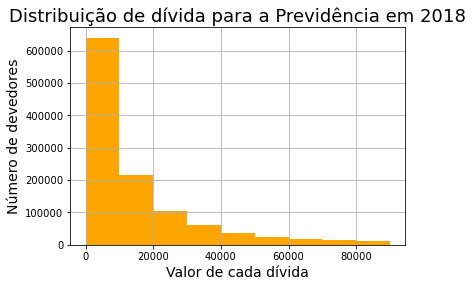

In [9]:
bordas = range(0, 10**5, 10**4)
plt.hist(rombo2018['VALOR_CONSOLIDADO'], bins=bordas, color='orange')
plt.xlabel('Valor de cada dívida', fontsize=14)
plt.ylabel('Número de devedores', fontsize=14)
plt.title('Distribuição de dívida para a Previdência em 2018', fontsize=18)
plt.grid(True)
plt.show()

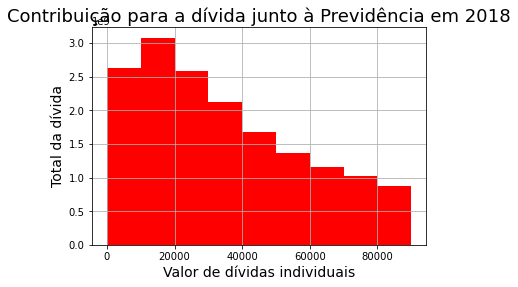

In [10]:
bordas = range(0, 10**5, 10**4)
plt.hist(rombo2018['VALOR_CONSOLIDADO'], bins=bordas, color='red', weights=rombo2018['VALOR_CONSOLIDADO'])
plt.xlabel('Valor de dívidas individuais', fontsize=14)
plt.ylabel('Total da dívida', fontsize=14)
plt.title('Contribuição para a dívida junto à Previdência em 2018', fontsize=18)
plt.grid(True)
plt.show()

In [24]:
# Mas os gráficos anteriores dizem respeito às entradas, não a devedores (um mesmo devedor pode ter várias entradas...)

devedores = rombo2018.groupby('CPF_CNPJ').agg('sum').sort_values(['VALOR_CONSOLIDADO'], ascending=[0])
devedores[:20]

,NUMERO_INSCRICAO,VALOR_CONSOLIDADO
CPF_CNPJ,,
33.000.167/0001-01,746545686,6.463746e+08
06.981.176/0001-58,2239028005,2.432596e+08
11.040.473/0001-39,1043695694,2.195780e+08
27.175.959/0001-14,18312149068,1.910296e+08
42.104.919/0001-75,1751778682,1.876355e+08
06.845.747/0001-27,2387021962,1.447619e+08
52.645.009/0012-06,706619190,1.362196e+08
05.058.458/0001-15,1427576408,1.177480e+08
33.719.485/0001-27,438975704,1.131813e+08


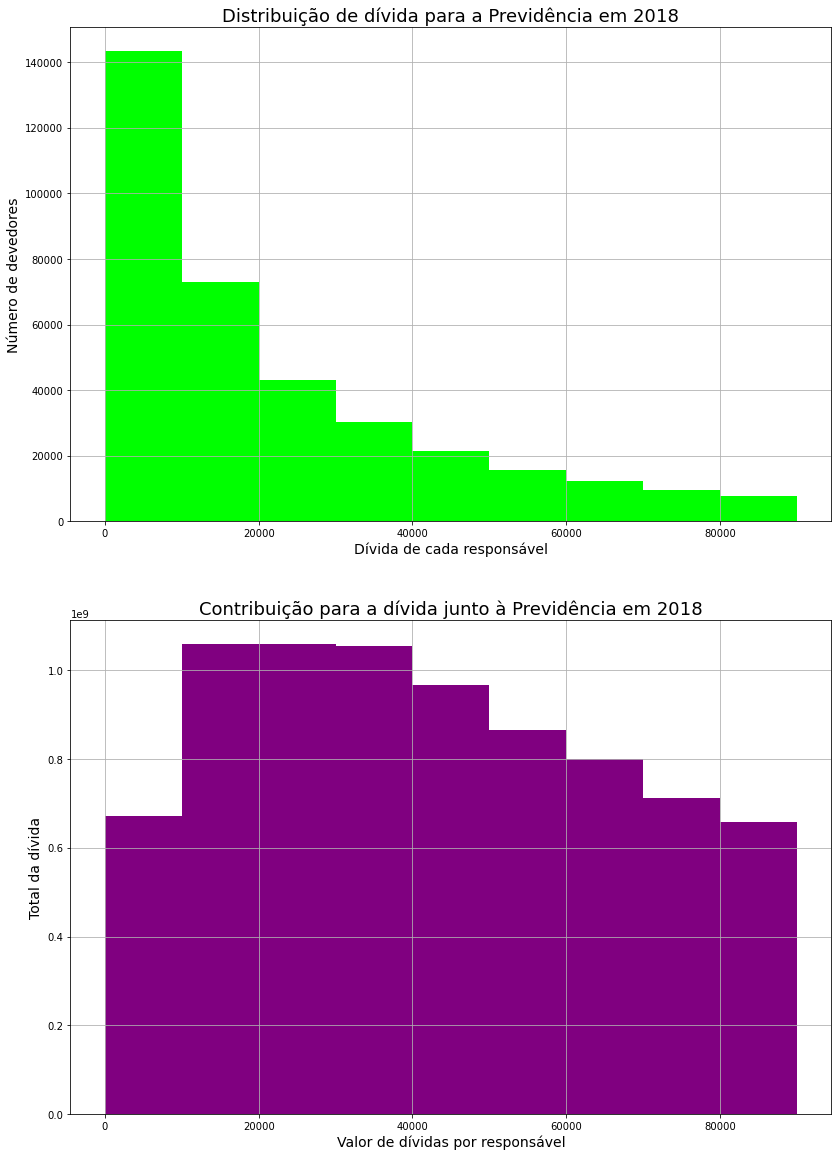

In [26]:
plt.figure(figsize=(30,20))
mapa = GridSpec(2,2)
bordas = range(0, 10**5, 10**4)

plt.subplot(mapa[0,0])
plt.hist(devedores['VALOR_CONSOLIDADO'], bins=bordas, color='lime')
plt.xlabel('Dívida de cada responsável', fontsize=14)
plt.ylabel('Número de devedores', fontsize=14)
plt.title('Distribuição de dívida para a Previdência em 2018', fontsize=18)
plt.grid(True)

plt.subplot(mapa[1,0])
plt.hist(devedores['VALOR_CONSOLIDADO'], bins=bordas, color='purple', weights=devedores['VALOR_CONSOLIDADO'])
plt.xlabel('Valor de dívidas por responsável', fontsize=14)
plt.ylabel('Total da dívida', fontsize=14)
plt.title('Contribuição para a dívida junto à Previdência em 2018', fontsize=18)
plt.grid(True)

plt.show()